In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Google_playstore_cleaned.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Date,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [6]:
# EDA
df[df.duplicated('App')].shape

(1181, 16)

In [9]:
# we have total 1181 records which are duplicates

df.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [10]:
df.shape

(9659, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Date            9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [14]:
# Numeric and categorical features 

numeric = [feature for feature in df.columns if df[feature].dtype!='O']
categorical = [feature for feature in df.columns if df[feature].dtype=='O']

print(f'We have {len(numeric)} Features, which are {numeric}')
print(f'We have {len(categorical)} Features, which are {categorical}')

We have 9 Features, which are ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Date', 'Month', 'Year']
We have 7 Features, which are ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_83332/3534905955.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric[i]],shade = True, color='r')
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_83332/3534905955.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric[i]],shade = True, color='r')
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_83332/3534905955.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric[i]],shade = True, color='r')
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_83332/3534905955.py:7: FutureWarning: 

`shade` is now depr

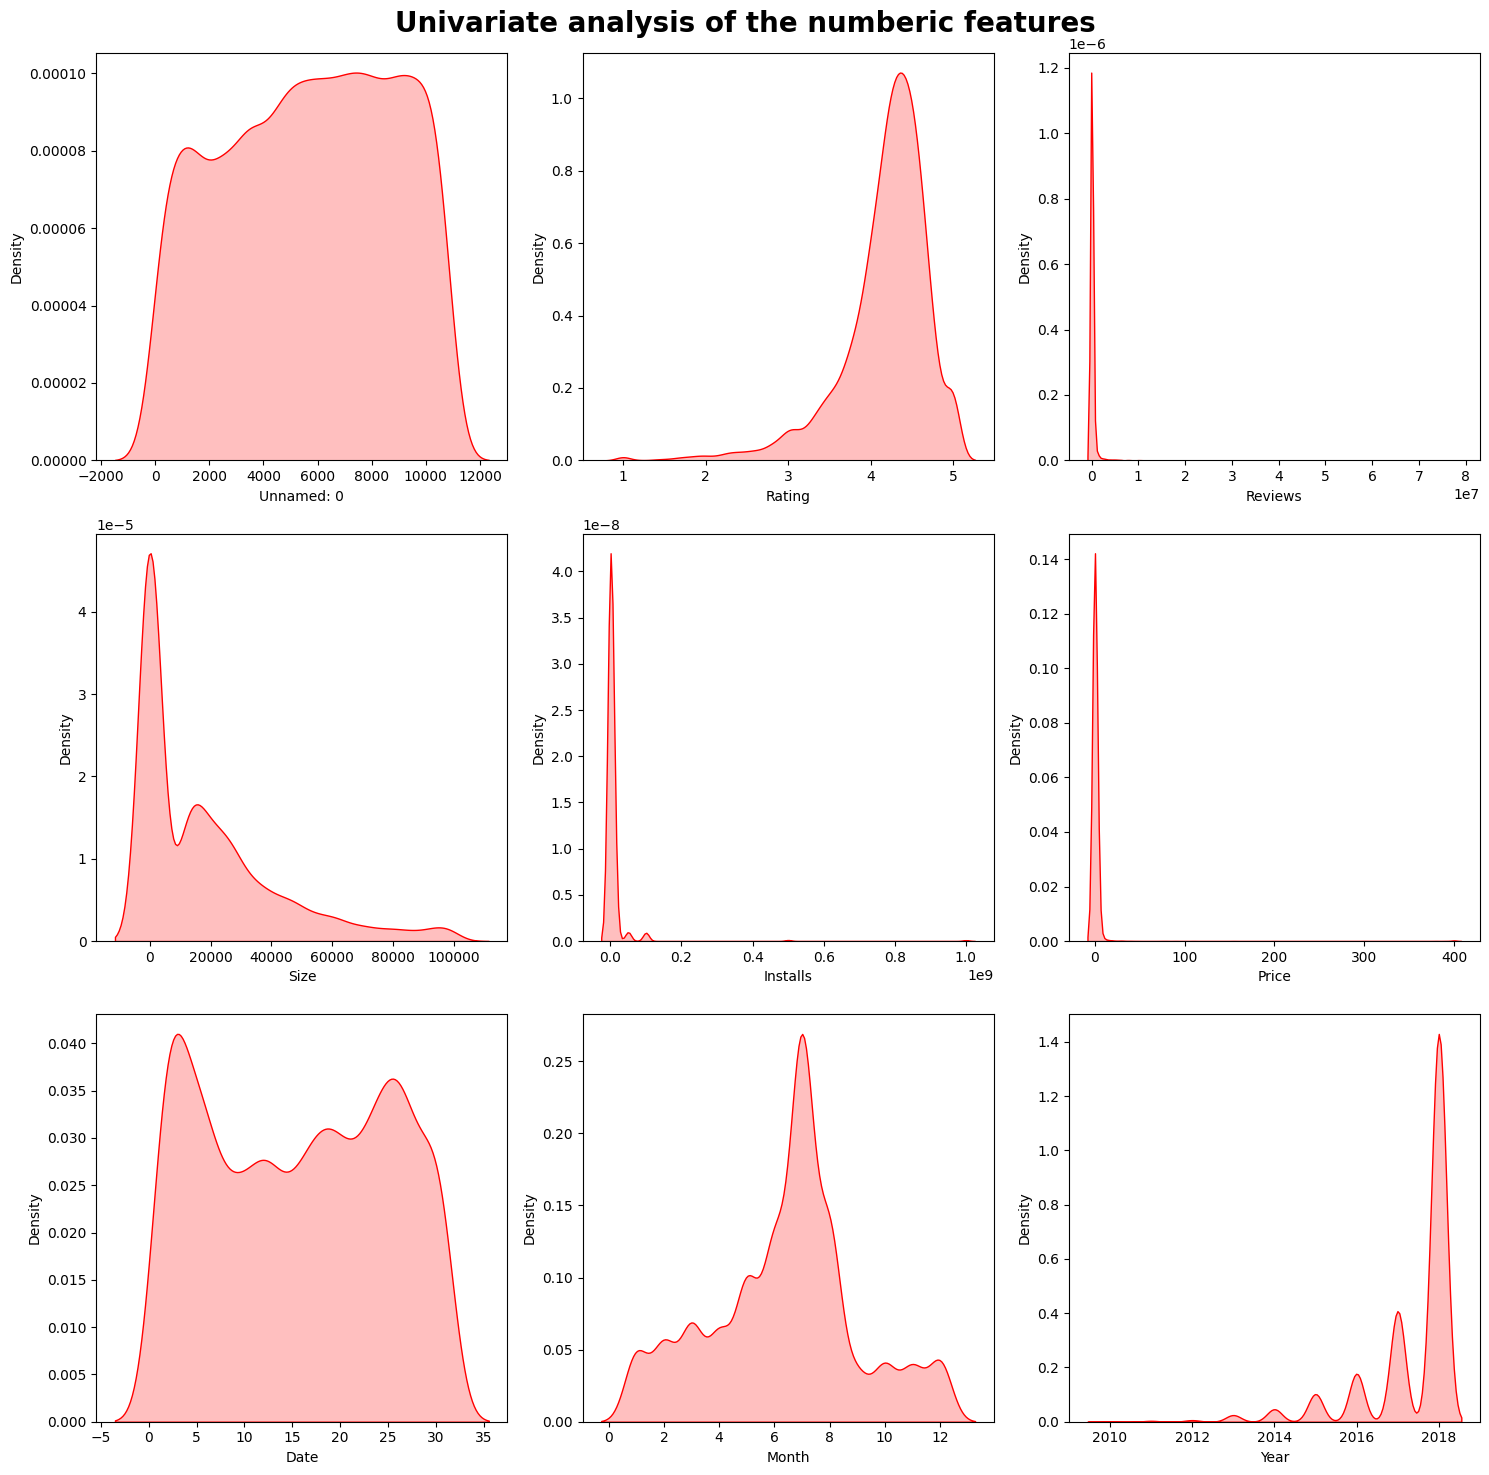

In [21]:
# Data proportion numeric
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of the numberic features",fontsize = 20, fontweight = 'bold' )

for i in range(0,len(numeric)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[numeric[i]],shade = True, color='r')
    plt.xlabel(numeric[i])
    plt.tight_layout()


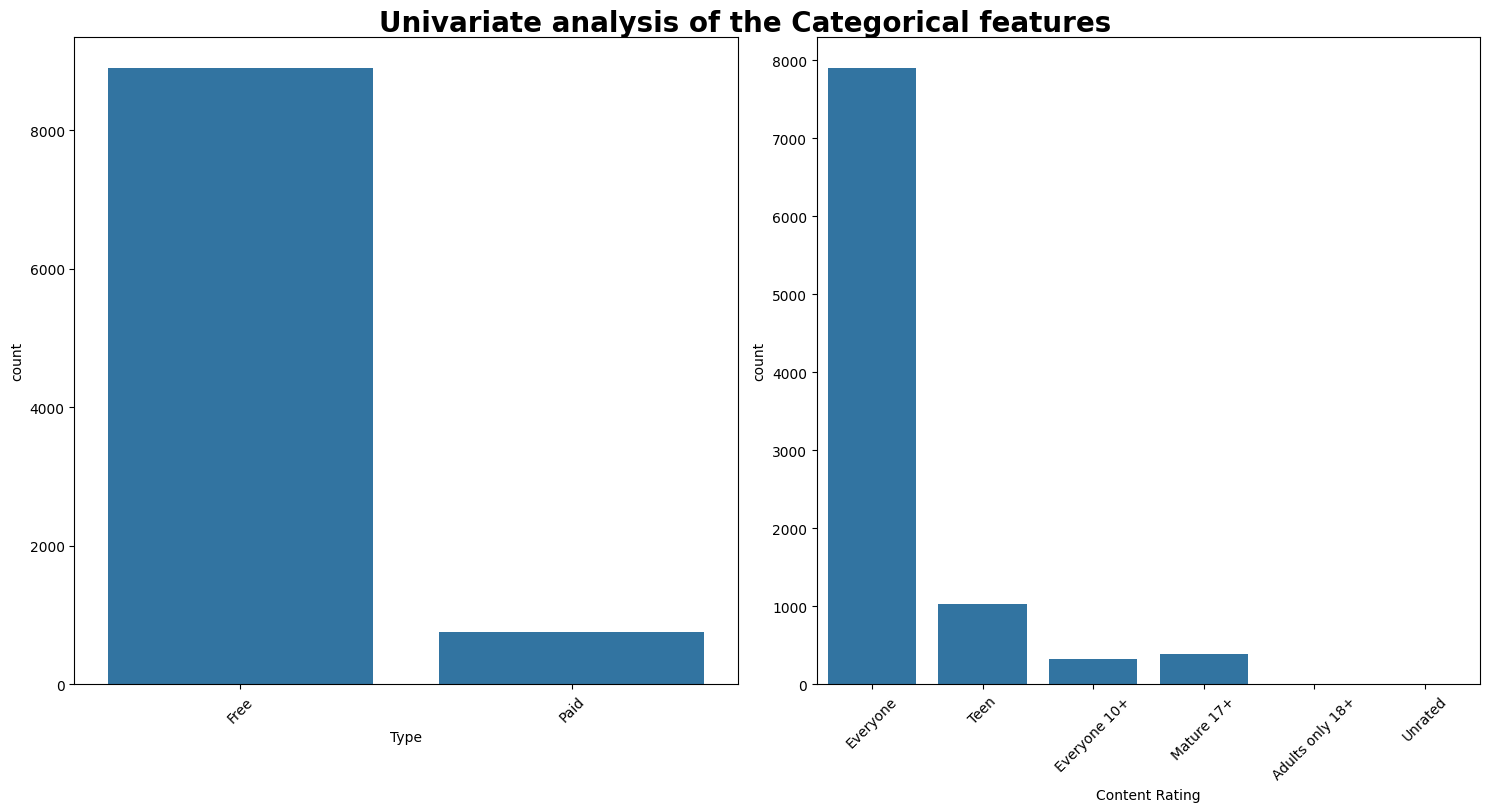

In [24]:
# Categorical columns 
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of the Categorical features",fontsize = 20, fontweight = 'bold' )
categories = ['Type','Content Rating']

for i in range(0,len(categories)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[categories[i]], )
    plt.xlabel(categories[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()


<Axes: ylabel='count'>

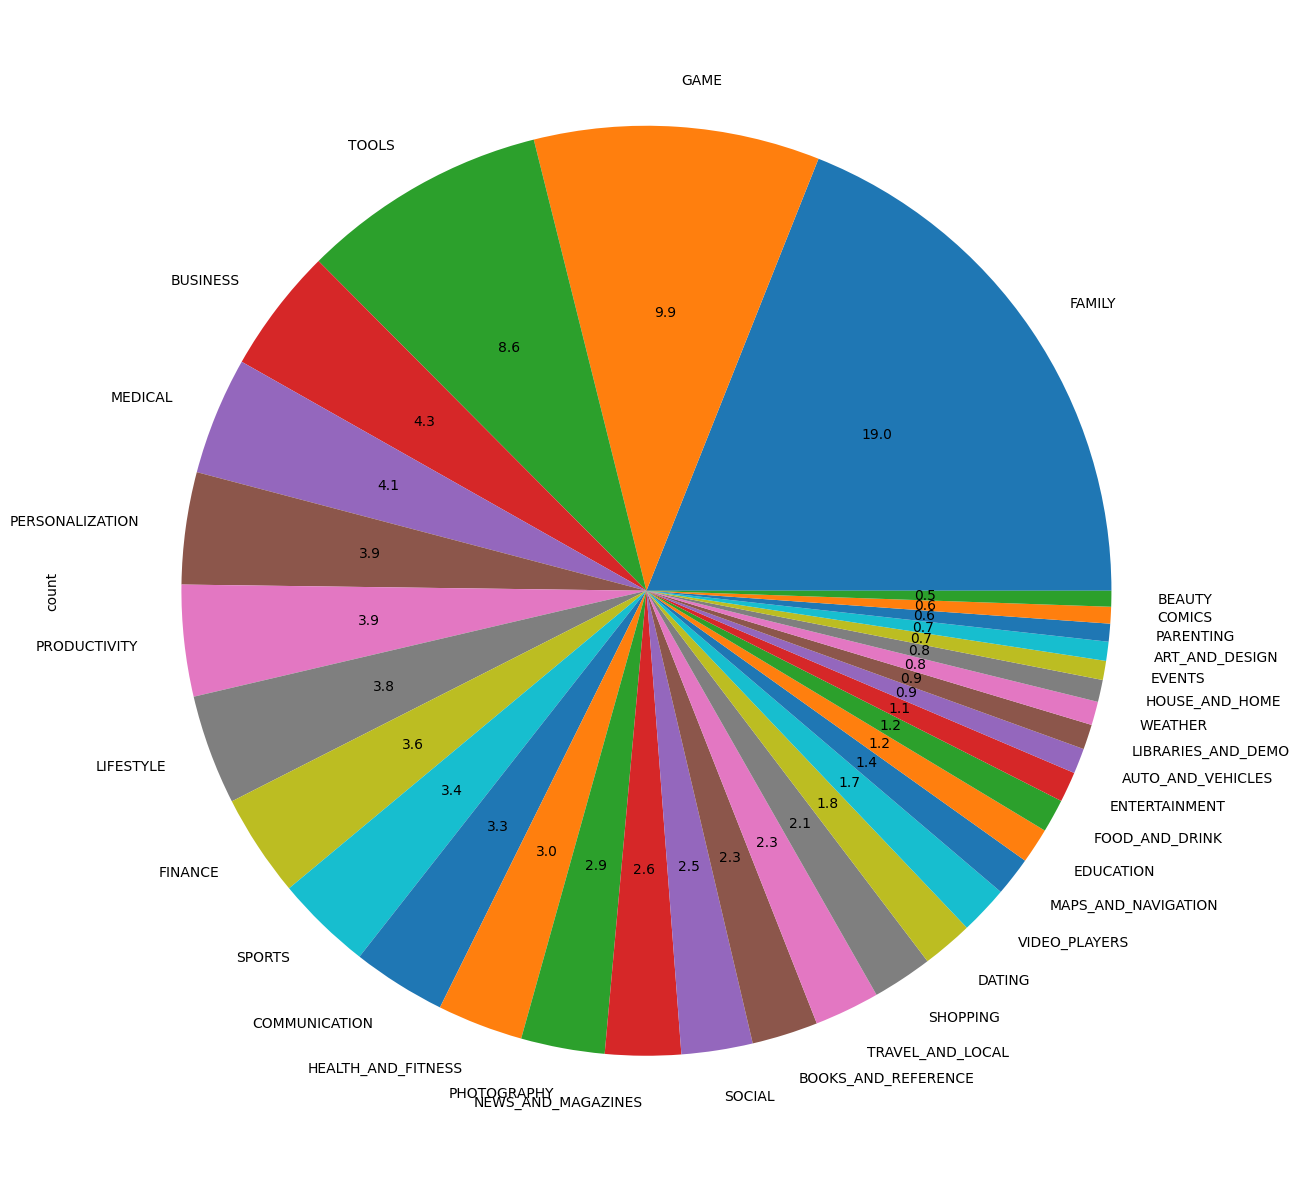

In [25]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct = '%1.1f')

In [29]:
Category = pd.DataFrame(df['Category'].value_counts())
Category.rename(columns={'Category':'Count'},inplace=True)

In [35]:
Category.columns

Index(['count'], dtype='object')

/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_83332/3479621915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Category.index[:10],y='count',data = Category[:10],palette='hls')


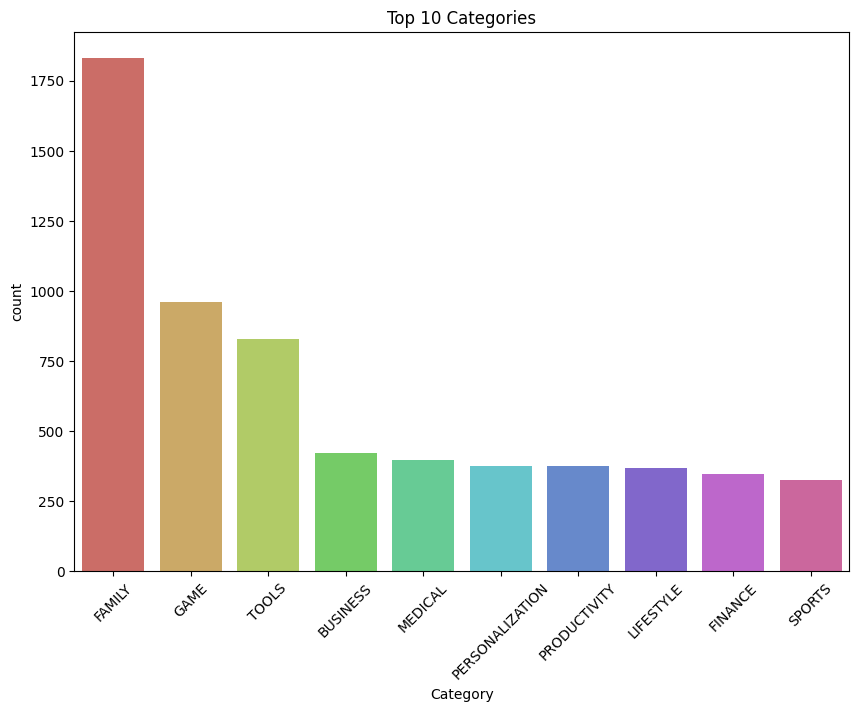

In [36]:
# Top 10 categories 
plt.figure(figsize=(10,7))
sns.barplot(x=Category.index[:10],y='count',data = Category[:10],palette='hls')
plt.title('Top 10 Categories')
plt.xticks(rotation=45)
plt.show()
